In [1]:
!pip install basemap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.0/569.0 kB 3.9 MB/s eta 0:00:00a 0:00:01
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Using cached pyproj-3.6.1-cp310-cp310-macosx_11_0_arm64.whl (4.9 MB)
  Using cached basemap_data-1.3.2-py2.py3-none-any.whl (30.5 MB)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from mpl_toolkits.basemap import Basemap
import numpy as np
import geopandas

import io
df = pd.read_csv('AWS_Honeypot_marx-geo.csv')
df.head()



,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [14]:
df.isnull().sum()

df.rename(columns = {'Unnamed: 15': 'Unnamed'}, inplace = True)

df=df.drop(['type', 'Unnamed'], axis=1)

df=df.dropna(subset=['latitude']) 

df =  df.dropna (subset=['longitude'])

df = df.dropna(subset=['country'])

df['num_attacks']=1

grouped_times=df.resample('1H').sum()

KeyError: "['type', 'Unnamed'] not found in axis"

In [15]:
df.head()

,datetime,host,src,proto,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,num_attack
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,1
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,1
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,1
3,3/3/13 21:58,groucho-us-east,841842716,UDP,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,1
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,1


((-175.0, 178.4167), (-43.5333, 20076.0))
69.9667


/var/folders/44/p6nfhbxj3qv43v729z5902g80000gn/T/ipykernel_6926/1550814522.py:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



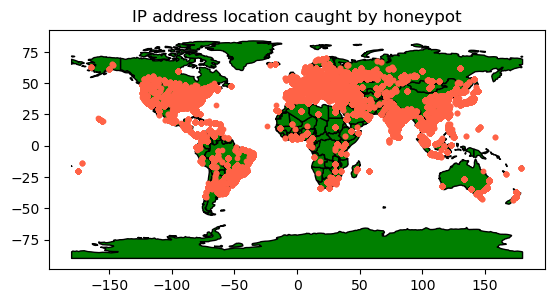

In [16]:
# Analysing the data
# 1. plotting the location of IP Address on the World Map
import geopandas as gpd
map = df[['longitude', 'latitude']]
map.head()
bbox = ((map.longitude.min(), map.longitude.max()), (map.latitude.min(), map.latitude.max()))
print(bbox)
map = map[map['latitude'] <= 90]
print(map.latitude.max())

gdf = gpd.GeoDataFrame(map,geometry=gpd.points_from_xy(map.longitude,map.latitude))
gdf.head()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='green',edgecolor='black')
ax.set(title = 'IP address location caught by honeypot')
gdf.plot(ax=ax,color='tomato',markersize=10)
plt.show()

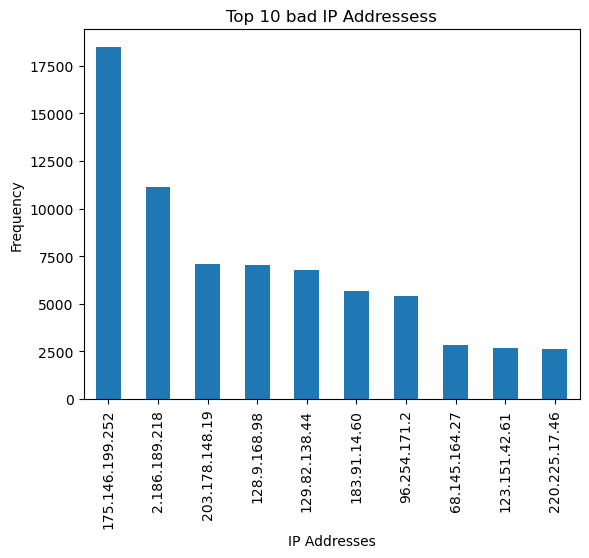

In [17]:
# Plotting  top 10 bad IP Addresses
sr=df['srcstr'].value_counts()[0:10]
sr.plot.bar()
plt.ylabel("Frequency")
plt.xlabel("IP Addresses")
plt.title("Top 10 bad IP Addressess")
plt.rcParams["figure.figsize"] = (20,20)

Text(0.5, 1.0, 'top 10 countries of origin of attacks')

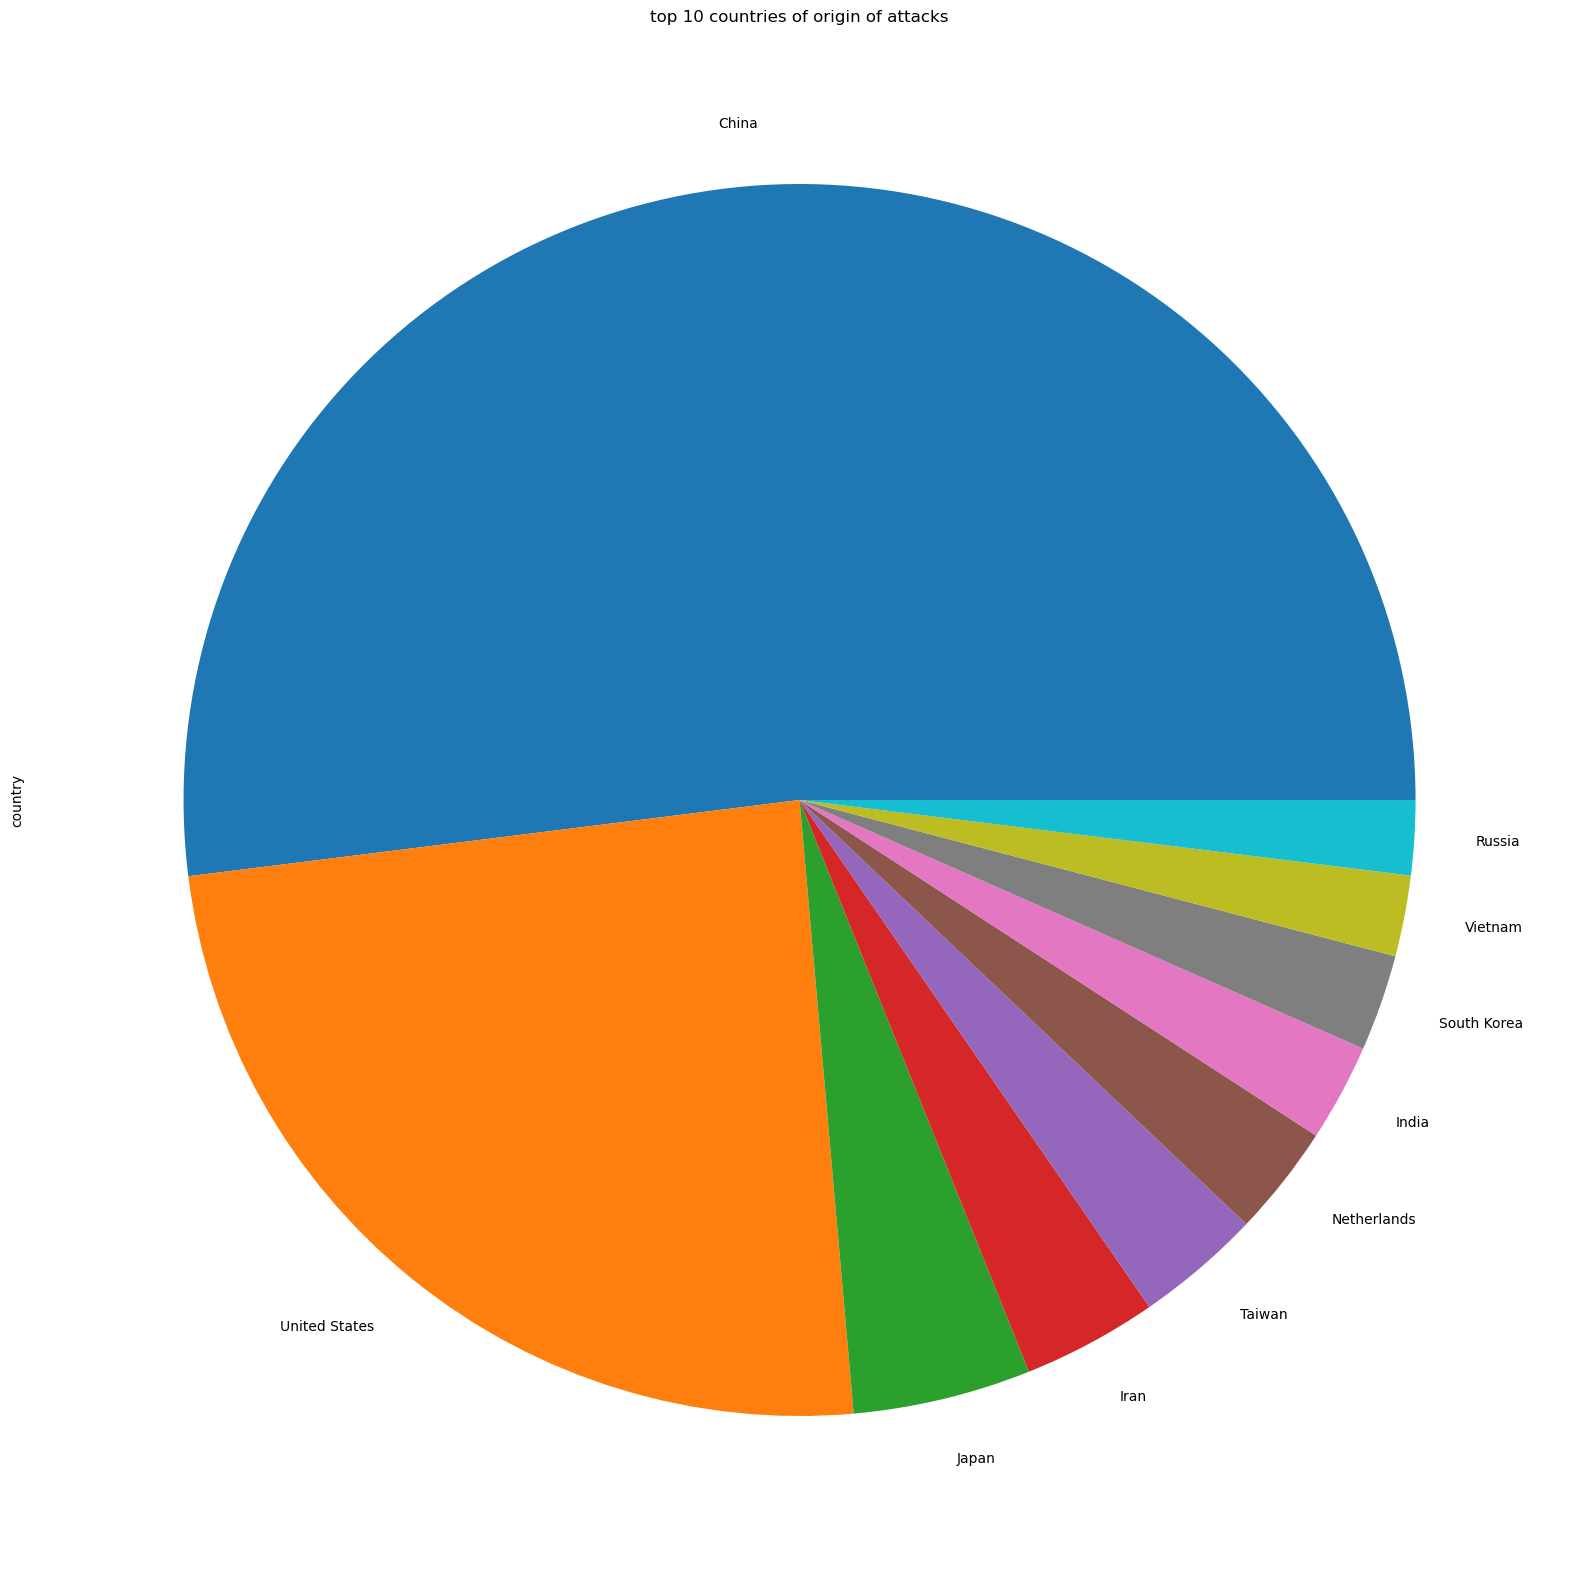

In [18]:
# Plotting top 10 country of origins
sr = df['country'].value_counts()[0:10]
sr.plot.pie()
plt.title("top 10 countries of origin of attacks")

/var/folders/44/p6nfhbxj3qv43v729z5902g80000gn/T/ipykernel_6926/2064568422.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/44/p6nfhbxj3qv43v729z5902g80000gn/T/ipykernel_6926/2064568422.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/44/p6nfhbxj3qv43v729z5902g80000gn/T/ipykernel_6926/2064568422.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Text(0.5, 1.0, 'FREQUENCY OF ATTACK IN EACH HOUR TIME SPAN')

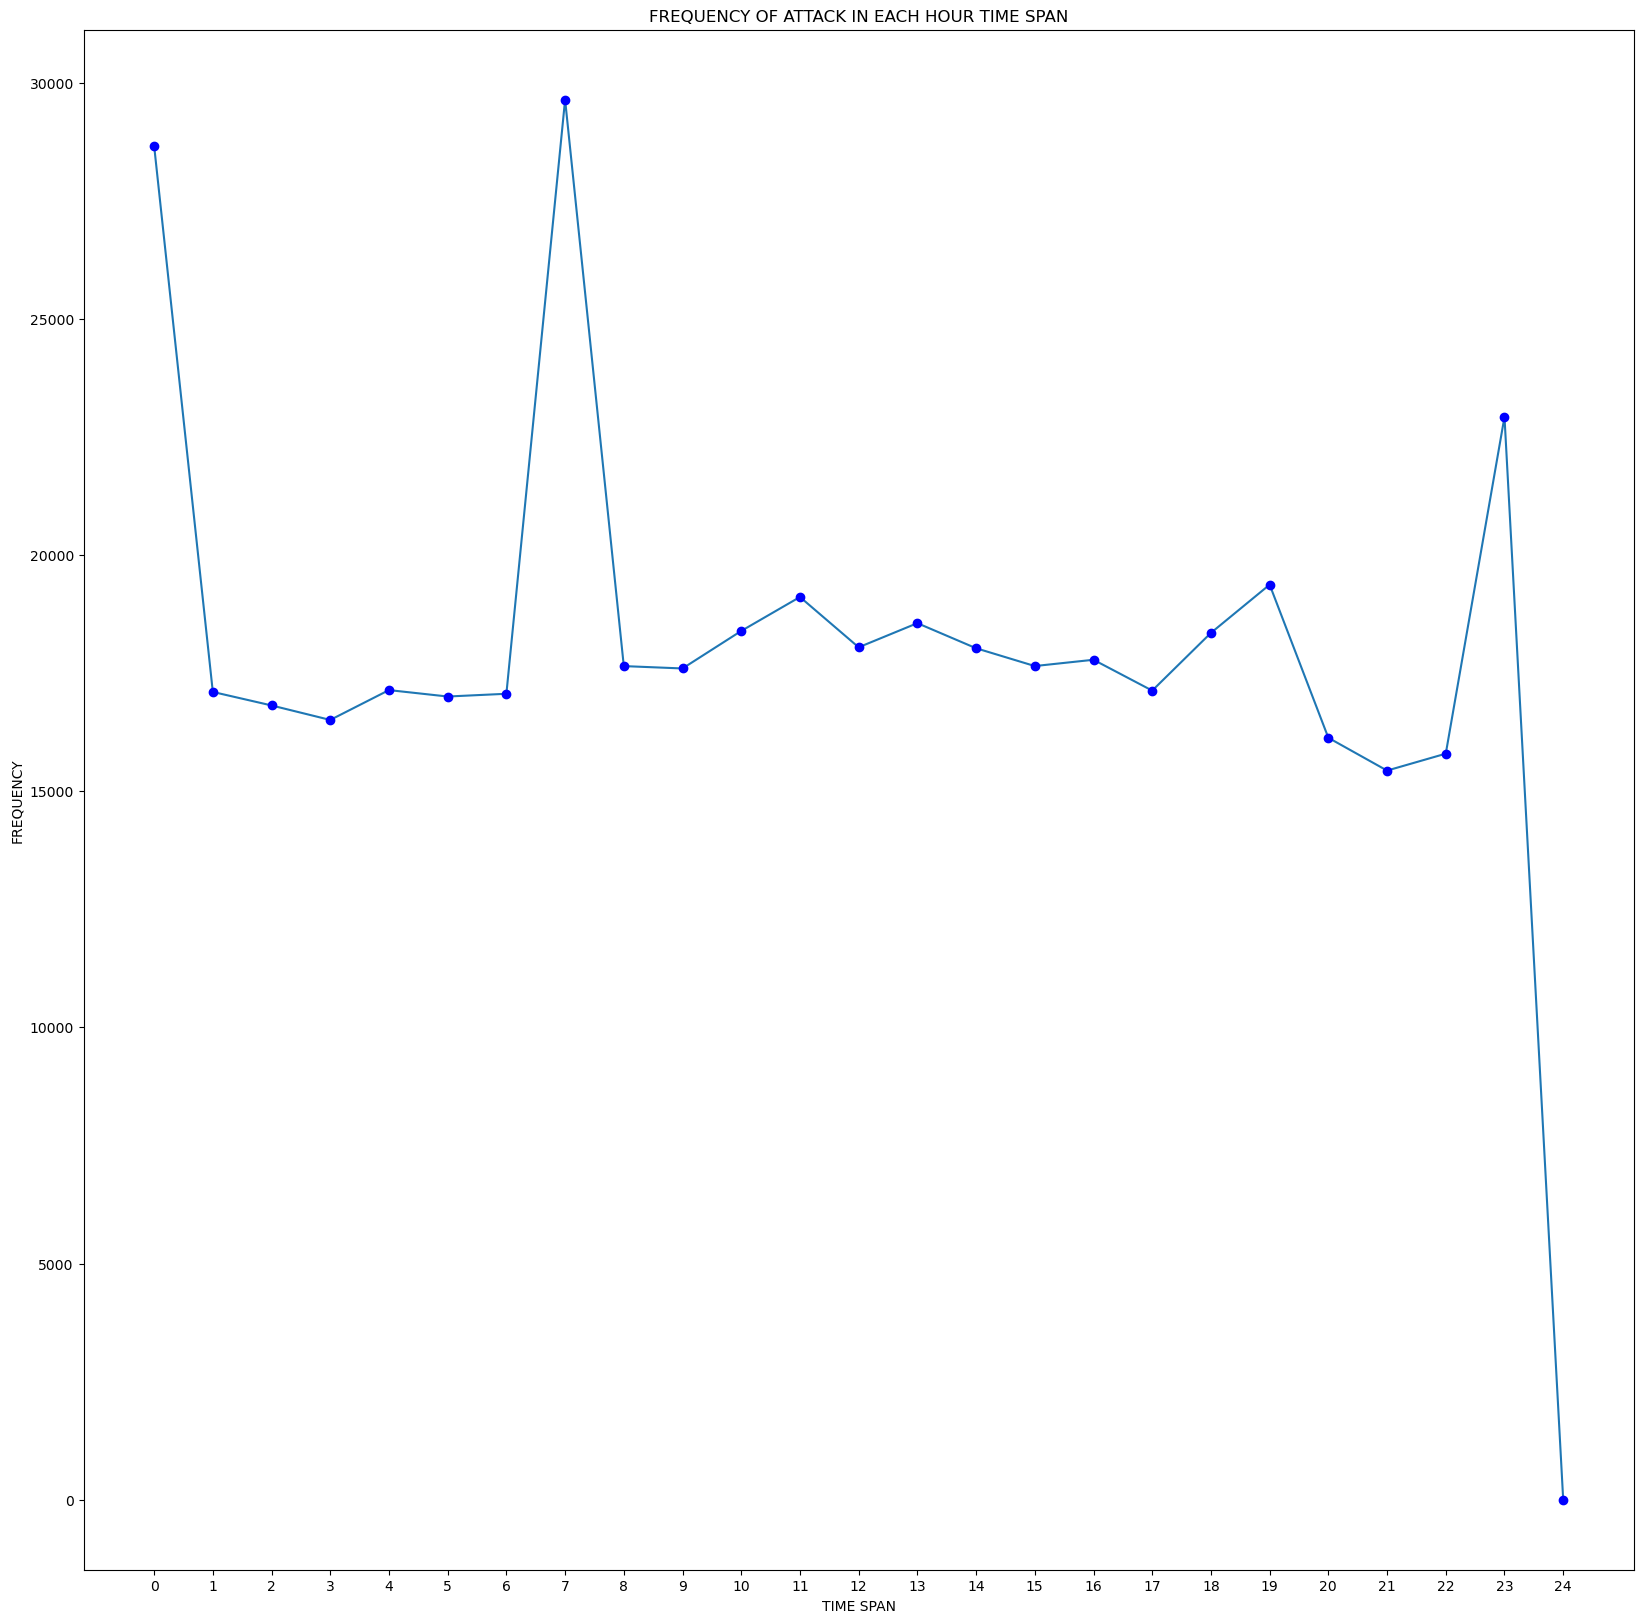

In [19]:
# plotting a frequency of attack in a hour span
df['datetime']=pd.to_datetime(df['datetime'])

time = df[['srcstr']]

time['year'] = df['datetime'].dt.year
time['month'] = df['datetime'].dt.month

time['day'] = df['datetime'].dt.day
time['hour'] = df['datetime'].dt.hour

time['minute'] = df['datetime'].dt.minute

arr=[]

t = []

for i in range(25):
  t.append(i)

for i in range(25):
  arr.append(0)

for x in time['hour']:
  arr[x]+=1

arr = np.asarray(arr)

t = np.asarray(t)

plt.plot(t,arr)

plt.xticks(np.arange(0,25,1))

plt.plot(t,arr, "ob")

plt.xlabel("TIME SPAN")

plt.ylabel("FREQUENCY")

plt.title("FREQUENCY OF ATTACK IN EACH HOUR TIME SPAN")

Text(0.5, 1.0, 'HOST ATTACKED')

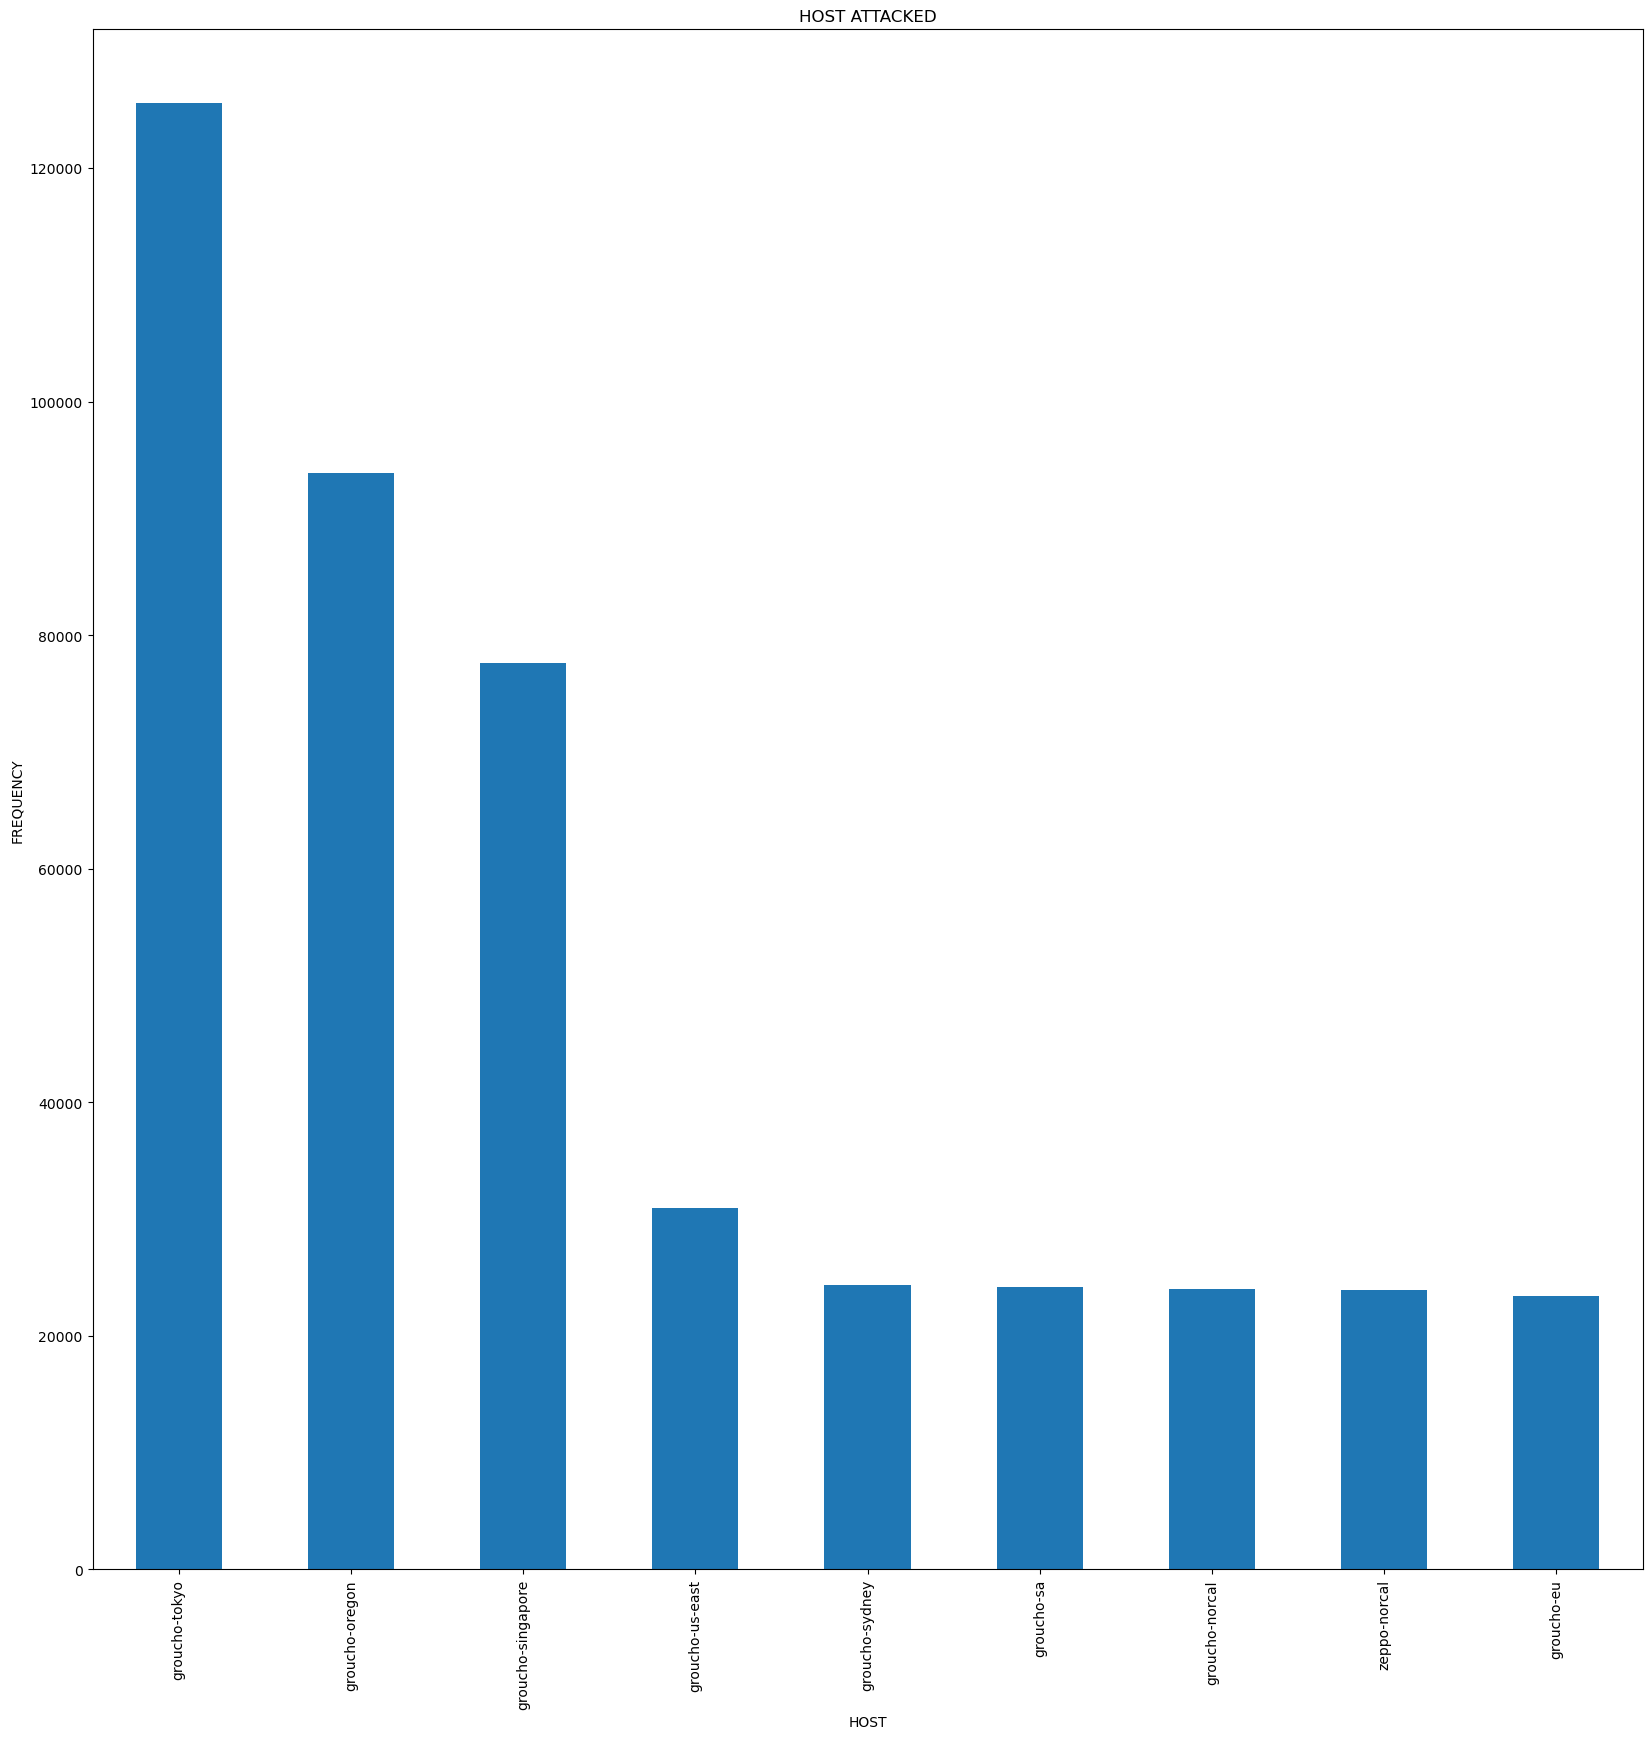

In [20]:
# Plotting frequency of attack on each host
sr=df['host'].value_counts()
sr.plot.bar()
plt.ylabel('FREQUENCY')
plt.xlabel('HOST')
plt.title('HOST ATTACKED')

In [28]:
df["year"] = df['datetime'].dt.year.astype(str)
df["month"] = df['datetime'].dt.month.apply(lambda x: month_list[x - 1])  # Adjusted to use your month_list
df["day"] = df['datetime'].dt.day.astype(str)
df["time"] = df['datetime'].dt.strftime('%H:%M')  # Extracts time in 'HH:MM' format
df["hour"] = df['datetime'].dt.hour.apply(lambda x: f"{x}h")  # Formats the hour with 'h' at the end

df.head()

,datetime,host,src,proto,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,num_attack,year,month,day,time,hour
0,2013-03-03 21:53:00,groucho-oregon,1032051418,TCP,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,1,2013,Mar.,3,21:53,21h
1,2013-03-03 21:57:00,groucho-oregon,1347834426,UDP,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,1,2013,Mar.,3,21:57,21h
2,2013-03-03 21:58:00,groucho-oregon,2947856490,TCP,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,1,2013,Mar.,3,21:58,21h
3,2013-03-03 21:58:00,groucho-us-east,841842716,UDP,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,1,2013,Mar.,3,21:58,21h
4,2013-03-03 21:58:00,groucho-singapore,3587648279,TCP,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,1,2013,Mar.,3,21:58,21h


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
d = df
d = d.drop('datetime', axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

d.host = le.fit_transform(d.host)
d.proto = le.fit_transform(d.proto)
d.cc = le.fit_transform(d.cc)
d.country = le.fit_transform(d.country)
d.locale = le.fit_transform(d.locale)
d.month = le.fit_transform(d.month)

# Separate the features from the target variable
d = d.drop('srcstr', axis=1)
d = d.drop('localeabbr', axis=1)
d = d.drop('time', axis=1)
d = d.drop('hour', axis=1)
d = d.drop('postalcode', axis=1)
X = d
X=X.dropna()
X.head()

,host,src,proto,spt,dpt,cc,country,locale,latitude,longitude,num_attack,year,month,day
0,2,1032051418,1,6000.0,1433.0,34,36,390,28.5500,115.9333,1,2013,4,3
1,2,1347834426,2,5270.0,5060.0,41,57,1179,51.0000,9.0000,1,2013,4,3
2,2,2947856490,1,2489.0,1080.0,159,157,1020,25.0392,121.5250,1,2013,4,3
3,7,841842716,2,43235.0,1900.0,163,169,681,45.5848,-122.9117,1,2013,4,3
4,4,3587648279,1,56577.0,80.0,54,54,1179,48.8600,2.3500,1,2013,4,3


In [30]:
X.isnull().sum()

host          0
src           0
proto         0
spt           0
dpt           0
cc            0
country       0
locale        0
latitude      0
longitude     0
num_attack    0
year          0
month         0
day           0
dtype: int64

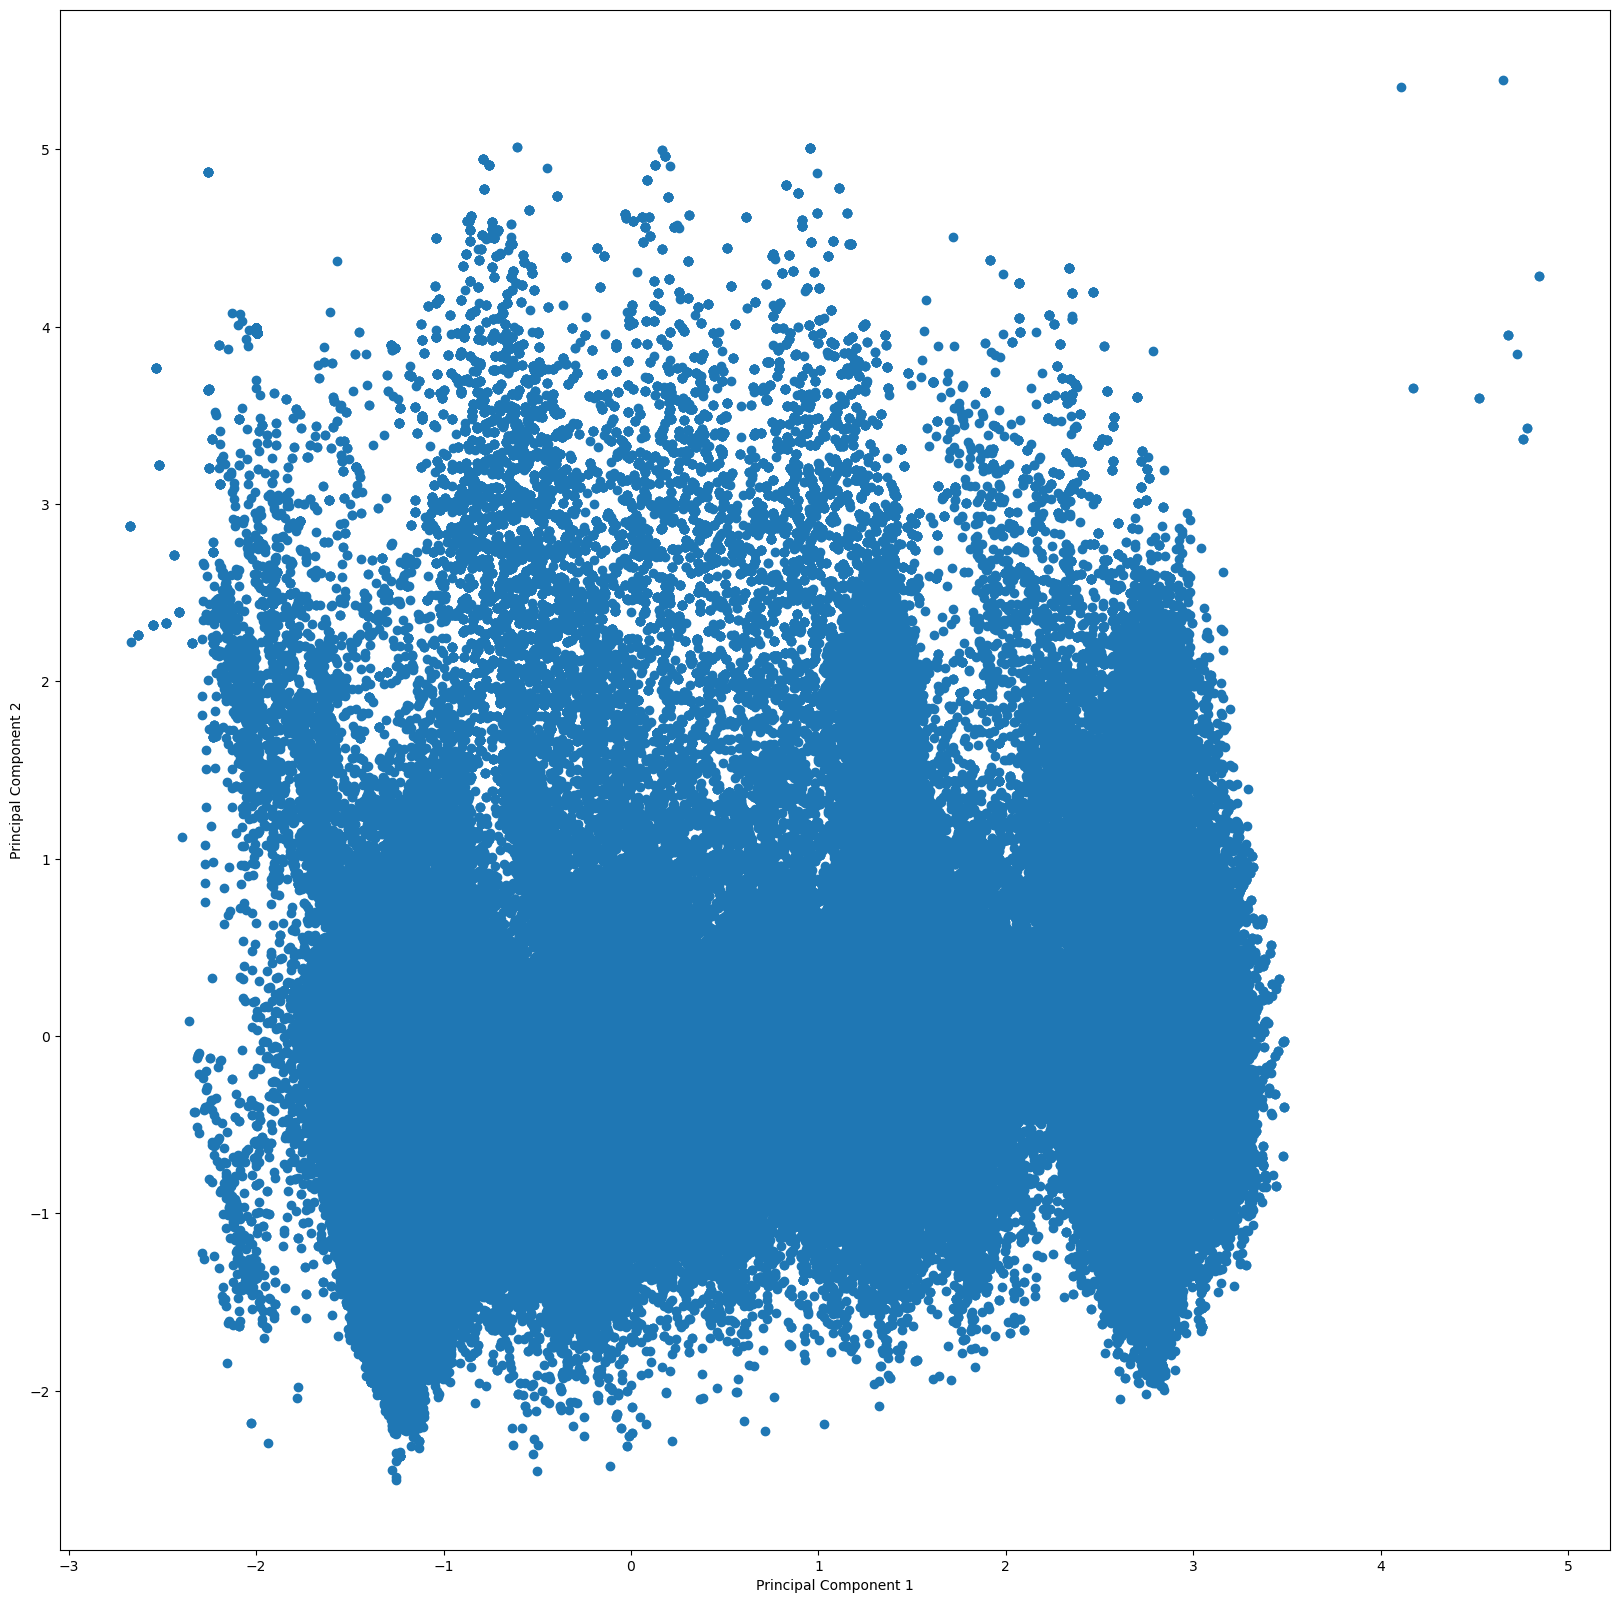

In [31]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [32]:
t = df
t = t.drop('datetime', axis=1)
t = t.drop('srcstr', axis=1)
t = t.drop('localeabbr', axis=1)
t = t.drop('time', axis=1)
t = t.drop('hour', axis=1)
t = t.drop('postalcode', axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

t.host = le.fit_transform(t.host)
t.proto = le.fit_transform(t.proto)
t.cc = le.fit_transform(t.cc)
t.locale = le.fit_transform(t.locale)
t.month = le.fit_transform(t.month)
t = t.dropna()
t.head()

,host,src,proto,spt,dpt,cc,country,locale,latitude,longitude,num_attack,year,month,day
0,2,1032051418,1,6000.0,1433.0,34,China,390,28.5500,115.9333,1,2013,4,3
1,2,1347834426,2,5270.0,5060.0,41,Germany,1179,51.0000,9.0000,1,2013,4,3
2,2,2947856490,1,2489.0,1080.0,159,Taiwan,1020,25.0392,121.5250,1,2013,4,3
3,7,841842716,2,43235.0,1900.0,163,United States,681,45.5848,-122.9117,1,2013,4,3
4,4,3587648279,1,56577.0,80.0,54,France,1179,48.8600,2.3500,1,2013,4,3


/var/folders/44/p6nfhbxj3qv43v729z5902g80000gn/T/ipykernel_6926/1110154474.py:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/var/folders/44/p6nfhbxj3qv43v729z5902g80000gn/T/ipykernel_6926/1110154474.py:33: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/44/p6nfhbxj3qv43v729z5902g80000gn/T/ipykernel_6926/1110154474.py:44: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, prov

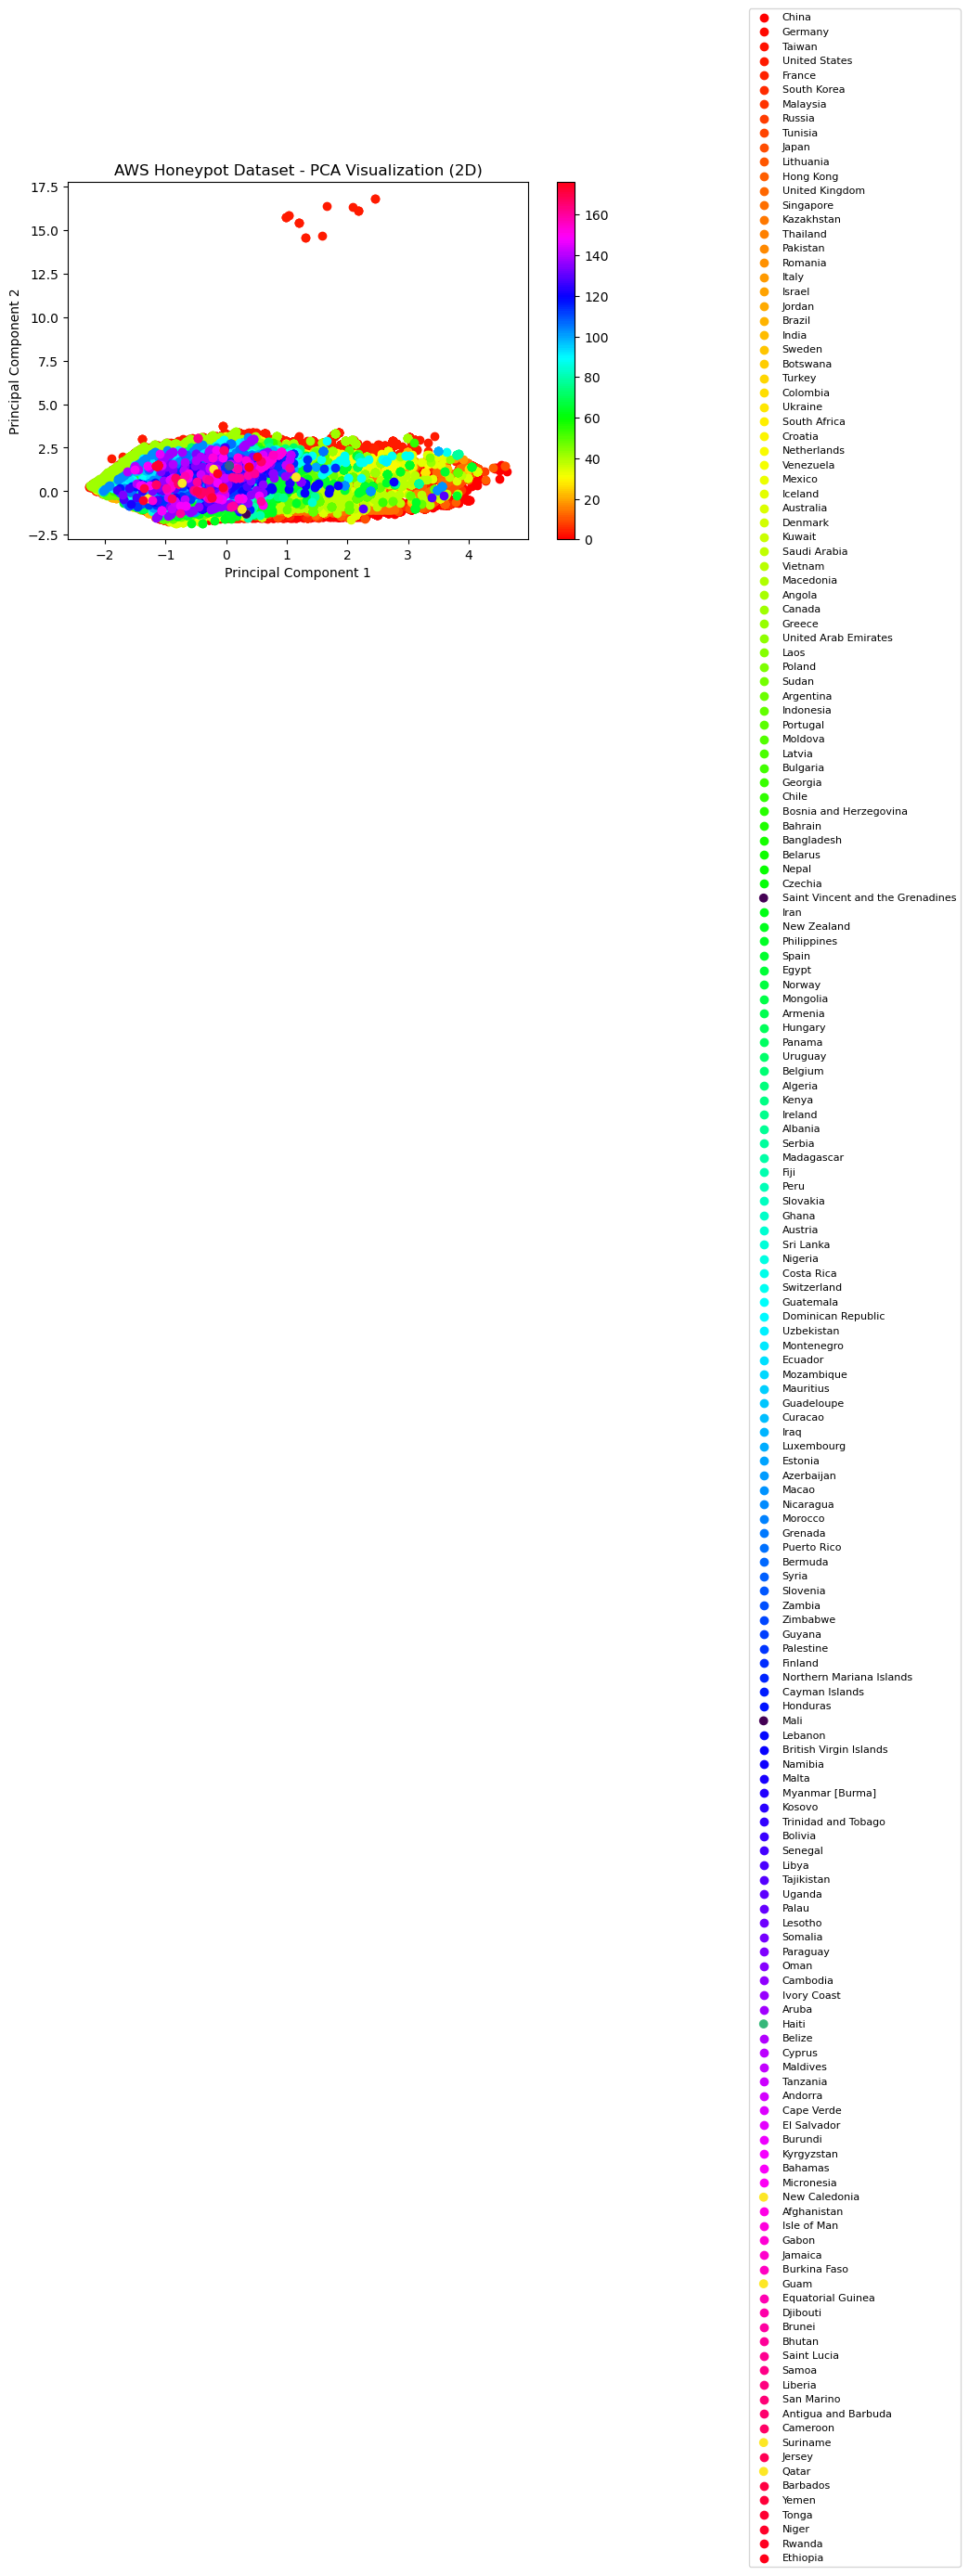

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select the columns for PCA visualization
columns = ['host','spt', 'dpt', 'latitude', 'longitude']

# Separate the features from the target variable
A = t[columns]
A=A.dropna()
# Standardize the feature values
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

# Perform PCA with 2 components
pca = PCA(n_components=2)
A_pca_2d = pca.fit_transform(A_scaled)

# Perform PCA with 3 components
pca = PCA(n_components=3)
A_pca_3d = pca.fit_transform(A_scaled)

# Create a color map for country column values
country_values = t['country'].unique()
color_map = plt.cm.get_cmap('hsv', len(country_values))

# Visualize the transformed data with color-coded data points in 2D
fig, ax = plt.subplots(figsize=(8, 5))
for i, country in enumerate(country_values):
    mask = t['country'] == country
    ax.scatter(A_pca_2d[mask, 0], A_pca_2d[mask, 1], c=color_map(i), marker='o', label=country)

# Set the plot labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('AWS Honeypot Dataset - PCA Visualization (2D)')

# Add legends and colorbar
ax.legend(bbox_to_anchor=(1.95, 1.50), fontsize="8")
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=0, vmax=len(country_values)-1))
sm.set_array([])
fig.colorbar(sm)

# Show the plot
plt.show()

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Read the dataset

dx= d

# Normalize the data
for col in dx.columns:
    if col != 'datetime' and col != 'host' and col != 'src' and col != 'proto' and col != 'type':
        dx[col] = dx[col].astype('float')
        dx[col] = dx[col] / dx[col].max()

dx = dx.dropna()
dx.isnull().sum()

host          0
src           0
proto         0
spt           0
dpt           0
cc            0
country       0
locale        0
latitude      0
longitude     0
num_attack    0
year          0
month         0
day           0
dtype: int64

In [35]:
dx

,host,src,proto,spt,dpt,cc,country,locale,latitude,longitude,num_attack,year,month,day
0,2,1032051418,1,0.091554,0.021878,0.193182,0.204545,0.330789,0.001422,0.649790,1.0,1.0,0.666667,0.096774
1,2,1347834426,2,0.080415,0.077252,0.232955,0.323864,1.000000,0.002540,0.050444,1.0,1.0,0.666667,0.096774
2,2,2947856490,1,0.037980,0.016489,0.903409,0.892045,0.865140,0.001247,0.681130,1.0,1.0,0.666667,0.096774
3,7,841842716,2,0.659724,0.029008,0.926136,0.960227,0.577608,0.002271,-0.688902,1.0,1.0,0.666667,0.096774
4,4,3587648279,1,0.863310,0.001221,0.306818,0.306818,1.000000,0.002434,0.013171,1.0,1.0,0.666667,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451576,2,1922977453,1,0.948730,0.006794,0.471591,0.454545,0.899915,0.001777,0.783287,1.0,1.0,1.000000,0.258065
451577,0,1017974360,1,0.091554,0.123511,0.193182,0.204545,0.022053,0.001587,0.657342,1.0,1.0,1.000000,0.258065
451578,2,3234358955,1,0.091554,0.021878,0.926136,0.960227,0.095844,0.001696,-0.662854,1.0,1.0,1.000000,0.258065
451579,6,28142724,1,0.054246,0.006794,0.903409,0.892045,0.865140,0.001247,0.681130,1.0,1.0,1.000000,0.258065


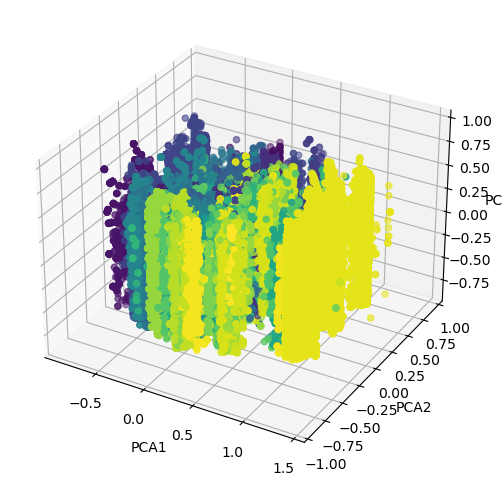

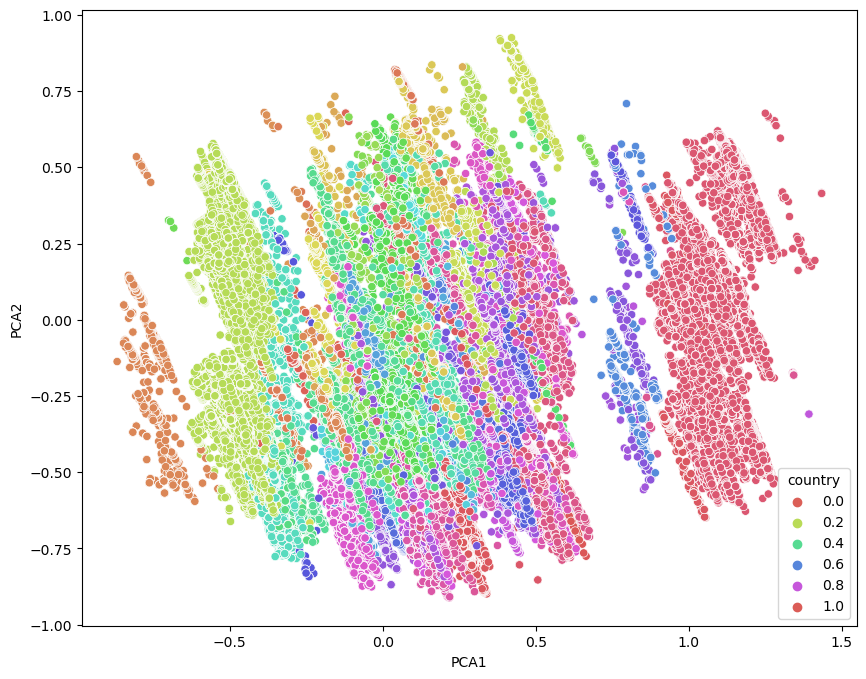

In [36]:
# Perform PCA
pca = PCA(n_components=3) 
pca_transformed = pca.fit_transform(dx.drop(['host', 'src', 'proto'], axis=1))
                                  
# Visualize PCA dimensions
fig = plt.figure(figsize=(8,6)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(pca_transformed[:,0], pca_transformed[:,1], pca_transformed[:,2], c=dx['country'], cmap='viridis')
ax.set_xlabel('PCA1') 
ax.set_ylabel('PCA2') 
ax.set_zlabel('PCA3')
plt.show() 

# 2D Visualization 
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_transformed[:,0], y=pca_transformed[:,1], hue=dx['country'], palette='hls')
plt.xlabel('PCA1') 
plt.ylabel('PCA2')
plt.show()